# Implementing Deep Neural Network Using PyTorch
This is the second program of homework 4. There is no need to write any code in this part, but please read and execute each cell.
https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html


## PyTorch Introduction
[PyTorch](https://pytorch.org/) is an open source machine learning and deep learning framework. PyTorch allows you to manipulate and process data and write machine learning algorithms using Python code. Many of the worlds largest technology companies such as [Meta (Facebook)](https://ai.facebook.com/blog/pytorch-builds-the-future-of-ai-and-machine-learning-at-facebook/), Tesla and Microsoft as well as artificial intelligence research companies such as [OpenAI use PyTorch](https://openai.com/blog/openai-pytorch/) to power research and bring machine learning to their products.

![pytorch being used across industry and research](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-pytorch-being-used-across-research-and-industry.png)

For example, Andrej Karpathy (head of AI at Tesla) has given several talks ([PyTorch DevCon 2019](https://youtu.be/oBklltKXtDE), [Tesla AI Day 2021](https://youtu.be/j0z4FweCy4M?t=2904)) about how Tesla use PyTorch to power their self-driving computer vision models.

PyTorch is also used in other industries such as argiculture to [power computer vision on tractors](https://medium.com/pytorch/ai-for-ag-production-machine-learning-for-agriculture-e8cfdb9849a1).

Machine learning researchers love using PyTorch. And as of June 2022, PyTorch is the [most used deep learning framework on Papers With Code](https://paperswithcode.com/trends), a website for tracking machine learning research papers and the code repositories attached with them.

PyTorch also helps take care of many things such as GPU acceleration (making your code run faster) behind the scenes. So you can focus on manipulating data and writing algorithms and PyTorch will make sure it runs fast.

And if companies such as Tesla and Meta (Facebook) use it to build models they deploy to power hundreds of applications, drive thousands of cars and deliver content to billions of people, it's clearly capable on the development front too.

## Goals
This part of the homework 4 will demonstrate a multiclassification task (Fashion MINIST) and a regression task (Predicting California Housing Price) using PyTorch.

By the end of this homework, you'll be able to do the following in PyTorch:

* Use PyTorch to quickly set up a deep neural network
* Train a PyTorch model
* Save the trained parameters and load pretrained parameters

Programming frameworks like PyTorch and Tensorflow not only cut down on time spent coding, but can also perform optimizations that speed up the code itself.

## Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures.

In [1]:
# Python ≥3.5 is required
import sys

# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Import Scikit-learn
import sklearn

# Common imports
import numpy as np
import os

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"Python version: {sys.version_info}\nPyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}\nsklearn version: {sklearn.__version__}")

Python version: sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)
PyTorch version: 2.1.0+cu118
torchvision version: 0.16.0+cu118
sklearn version: 1.2.2


## Building an Image Classifier Using PyTorch

### Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iteralbe over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


### Getting a dataset

To begin working on a computer vision problem, let's get a computer vision dataset.

We're going to start with FashionMNIST.

MNIST stands for Modified National Institute of Standards and Technology.

The [original MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.

[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), made by Zalando Research, is a similar setup. Except it contains grayscale images of 10 different kinds of clothing. The images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than the traditional MNIST dataset.

![example image of FashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)
*`torchvision.datasets` contains a lot of example datasets you can use to practice writing computer vision code on. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.*

Later, we'll be building a computer vision neural network to identify the different styles of clothing in these images.

PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets`.

Including FashionMNIST in [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15605154.98it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 282743.23it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5514163.87it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6885292.41it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Let's check out the shape of the training set.

In [3]:
train_data.data.shape # (number of examples, height, width)

torch.Size([60000, 28, 28])

In [4]:
train_data.targets.shape # (number of labels)

torch.Size([60000])

Let's check out the first sample of the training data.

In [5]:
# See first training sample (input and label)
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### Input and output shapes of a computer vision model

We've got a big tensor of values (the image) leading to a single value for the target (the label).

Let's see the image shape.

In [6]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

The shape of the image tensor is `[1, 28, 28]` or more specifically:

```
[color_channels=1, height=28, width=28]
```

Having `color_channels=1` means the image is grayscale.

If `color_channels=3`, the image comes in pixel values for red, green and blue (this is also known a the [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model)).

The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width).

There's debate on whether images should be represented as `CHW` (color channels first) or `HWC` (color channels last).

> **Note:** You'll also see `NCHW` and `NHWC` formats where `N` stands for *number of images*. For example if you have a `batch_size=32`, your tensor shape may be `[32, 1, 28, 28]`. We'll cover batch sizes later.

PyTorch generally accepts `NCHW` (channels first) as the default for many operators.

However, PyTorch also explains that `NHWC` (channels last) performs better and is [considered best practice](https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice).

For now, since our dataset and models are relatively small, this won't make too much of a difference.

But keep it in mind for when you're working on larger image datasets and using convolutional neural networks (we'll see these later).

Let's check out more shapes of our data.

In [7]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

So we've got 60,000 training samples and 10,000 testing samples.

What classes are there?

We can find these via the `.classes` attribute.

In [8]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Sweet! It looks like we're dealing with 10 different kinds of clothes.

Because we're working with 10 different classes, it means our problem is **multi-class classification**.

Let's get visual.

### Visualizing our data

Image shape: torch.Size([1, 28, 28])


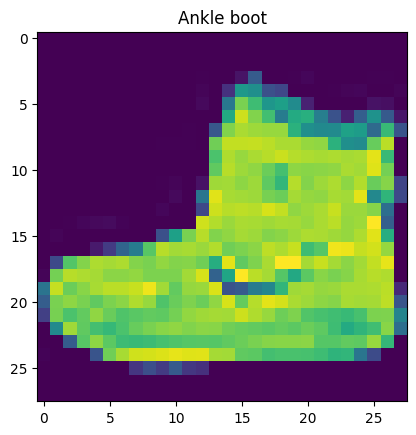

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(class_names[label]);

We can turn the image into grayscale using the `cmap` parameter of `plt.imshow()`.

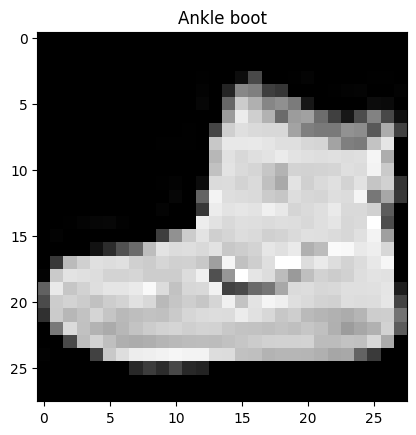

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

Beautiful, well as beautiful as a pixelated grayscale ankle boot can get.

Let's view a few more.

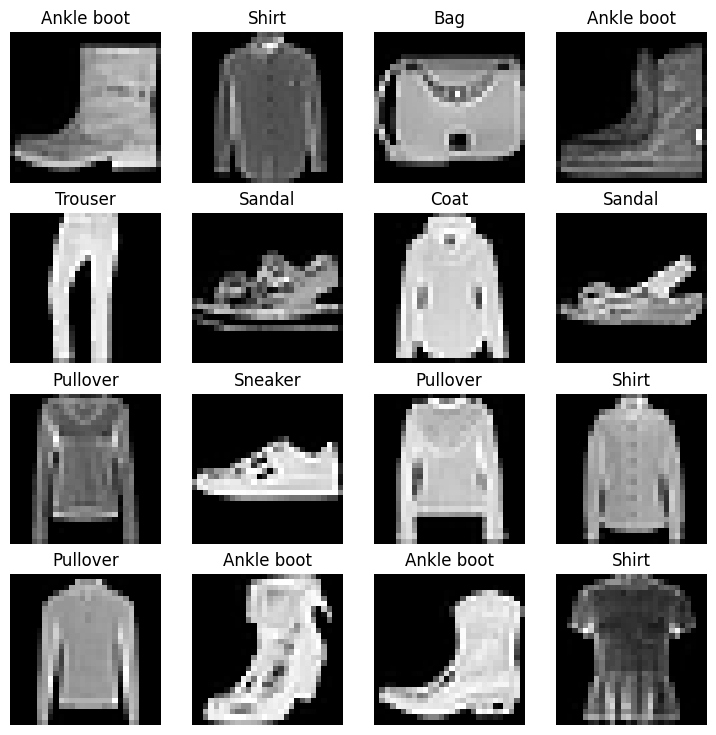

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

Hmmm, this dataset doesn't look too aesthetic.

But the principles we're going to learn on how to build a model for it will be similar across a wide range of computer vision problems.

In essence, taking pixel values and building a model to find patterns in them to use on future pixel values.

Plus, even for this small dataset (yes, even 60,000 images in deep learning is considered quite small), could you write a program to classify each one of them?

You probably could.

But I think coding a model in PyTorch would be faster.

### Prepare DataLoader

Now we've got a dataset ready to go.

The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) or `DataLoader` for short.

The `DataLoader` does what you think it might do. It helps load data into a machine learning model for training and for inference. It turns a large `Dataset` into a Python iterable of smaller chunks. These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

Why do this?

Because it's more computationally efficient.

In an ideal world you could do the forward pass and backward pass across all of your data at once. But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches.

It also gives your model more opportunities to improve.

With **mini-batches** (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

What's a good batch size?

[32 is a good place to start](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) for a fair amount of problems.

But since this is a value you can set (a **hyperparameter**) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

![an example of what a batched dataset looks like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
*Batching FashionMNIST with a batch size of 32 and shuffle turned on. A similar batching process will occur for other datasets but will differ depending on the batch size.*

Let's create `DataLoader`'s for our training and test sets.

In [12]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7efb82b774c0>, <torch.utils.data.dataloader.DataLoader object at 0x7efb82b775e0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [13]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

And we can see that the data remains unchanged by checking a single sample.

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


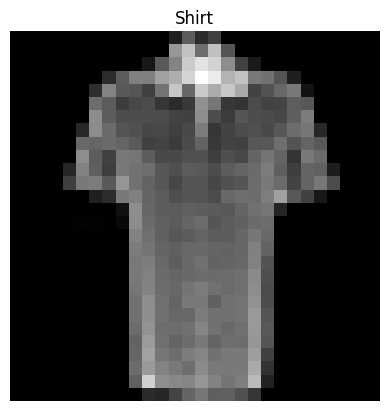

In [14]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

### Build a NN model

Now that we have loaded data. It is time to build a **deep neural network model** by subclassing `nn.Module`.

Our baseline will consist of three [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers. We'll also put non-linear functions (nn.ReLU()) in between each linear layer.

Since we're working with image data, we're going to use a different layer to start things off. And that's the [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer.

`nn.Flatten()` compresses the dimensions of a tensor into a single vector.

This is easier to understand when you see it.

In [15]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0] # (1, 28, 28)

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


The `nn.Flatten()` layer took our shape from `[color_channels, height, width]` to `[color_channels, height*width]`.

Why do we do this?

Because we've now turned our pixel data from height and width dimensions into one long **feature vector**. And `nn.Linear()` layers like their inputs to be in the form of feature vectors.

Let's create our first model using `nn.Flatten()` as the first layer.

In [16]:
from torch import nn
class FashionMNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units_1: int, hidden_units_2: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units_1),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units_1, out_features=hidden_units_2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units_2, out_features=output_shape),
            # Don't add a softmax layer here, since it will be included in the cross entropy loss function!
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

Wonderful!

We've got a baseline model class we can use, now let's instantiate a model.

We'll need to set the following parameters:
* `input_shape=784` - this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).
* `hidden_units_1=300` - number of units/neurons in the first hidden layer.
* `hidden_units_2=100` - number of units/neurons in the second hidden layer.
* `output_shape=len(class_names)` - since we're working with a multi-class classification problem, we need an output neuron per class in our dataset.

Let's create an instance of our model and send to the CPU for now (we'll run a small test for running `fashionMNISTModel` on CPU vs. a similar model on GPU soon).

In [17]:
torch.manual_seed(42)

# Need to setup model with input parameters
fashionMNISTModel = FashionMNISTModel(input_shape=784, # one for every pixel (28x28)
    hidden_units_1=300, # how many units in the first hiden layer
    hidden_units_2=100, # how many units in the second hiden layer
    output_shape=len(class_names) # one for every class
)
fashionMNISTModel.to("cpu") # keep model on CPU to begin with

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

### Setup loss, optimizer, and evaluation metrics

Since we're working on a classification problem, let's bring in our [`helper_functions.py` script](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) and subsequently the `accuracy_fn()` we defined in [notebook 02](https://www.learnpytorch.io/02_pytorch_classification/).

> **Note:** Rather than importing and using our own accuracy function or evaluation metric(s), you could import various evaluation metrics from the [TorchMetrics package](https://torchmetrics.readthedocs.io/en/latest/).

In [18]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [19]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy()

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # includes softmax!
optimizer = torch.optim.SGD(params=fashionMNISTModel.parameters(), lr=0.1)

### Creating a function to time our experiments

Loss function and optimizer ready!

It's time to start training a model.

But how about we do a little experiment while we train.

I mean, let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

We'll train this model on the CPU but the next one on the GPU and see what happens.

Our timing function will import the [`timeit.default_timer()` function](https://docs.python.org/3/library/timeit.html#timeit.default_timer) from the Python [`timeit` module](https://docs.python.org/3/library/timeit.html).

In [20]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### Creating a training loop and training a model on batches of data

Beautiful!

Looks like we've got all of the pieces of the puzzle ready to go, a timer, a loss function, an optimizer, a model and most importantly, some data.

Let's now create a training loop and a testing loop to train and evaluate our model.

We'll be using the same steps as the previous notebook(s), though since our data is now in batch form, we'll add another loop to loop through our data batches.

Our data batches are contained within our `DataLoader`s, `train_dataloader` and `test_dataloader` for the training and test data splits respectively.

A batch is `BATCH_SIZE` samples of `X` (features) and `y` (labels), since we're using `BATCH_SIZE=32`, our batches have 32 samples of images and targets.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated **per batch** rather than across the whole dataset.

This means we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.

Let's step through it:
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

A fair few steps but...

...if in doubt, code it out.

In [21]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        fashionMNISTModel.train()
        # 1. Forward pass
        y_pred = fashionMNISTModel(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    fashionMNISTModel.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = fashionMNISTModel(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_fashionMNISTModel = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(fashionMNISTModel.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59407 | Test loss: 0.44314, Test acc: 83.72%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.40146 | Test loss: 0.40729, Test acc: 85.45%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.35879 | Test loss: 0.38391, Test acc: 86.22%

Train time on cpu: 42.295 seconds


Nice! Looks like our baseline model did fairly well.

It didn't take too long to train either, even just on the CPU, I wonder if it'll speed up on the GPU?

Let's write some code to evaluate our model.

### 4. Make predictions and get results

Since we're going to be building a few models, it's a good idea to write some code to evaluate them all in similar ways.

Namely, let's create a function that takes in a trained model, a `DataLoader`, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function.

In [22]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
fashionMNISTModel_results = eval_model(model=fashionMNISTModel, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
fashionMNISTModel_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.3839115500450134,
 'model_acc': 86.22204472843451}

Looking good!

We can use this dictionary to compare the baseline model results to other models later on.

### 5. Setup device agnostic-code (for using a GPU if there is one)
We've seen how long it takes to train ma PyTorch model on 60,000 samples on CPU.

> **Note:** Model training time is dependent on hardware used. Generally, more processors means faster training and smaller models on smaller datasets will often train faster than large models and large datasets.

Now let's setup some [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#best-practices) for our models and data to run on GPU if it's available.

If you're running this notebook on Google Colab, and you don't a GPU turned on yet, it's now time to turn one on via `Runtime -> Change runtime type -> Hardware accelerator -> GPU`. If you do this, your runtime will likely reset and you'll have to run all of the cells above by going `Runtime -> Run before`.

In [23]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Functionizing training and test loops

So far we've been writing train and test loops over and over.

Let's write them again but this time we'll put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll be sure to call `.to(device)` on our feature (`X`) and target (`y`) tensors.

For the training loop we'll create a function called `train_step()` which takes in a model, a `DataLoader` a loss function and an optimizer.

The testing loop will be similar but it'll be called `test_step()` and it'll take in a model, a `DataLoader`, a loss function and an evaluation function.

> **Note:** Since these are functions, you can customize them in any way you like. What we're making here can be considered barebones training and testing functions for our specific classification use case.

In [24]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

Woohoo!

Now we've got some functions for training and testing our model, let's run them.

We'll do so inside another loop for each epoch.

That way for each epoch we're going a training and a testing step.

> **Note:** You can customize how often you do a testing step. Sometimes people do them every five epochs or 10 epochs or in our case, every epoch.

Let's also time things to see how long our code takes to run on the GPU.

In [25]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 30
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=fashionMNISTModel,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=fashionMNISTModel,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.33095 | Train accuracy: 87.78%
Test loss: 0.36179 | Test accuracy: 86.54%

Epoch: 1
---------
Train loss: 0.31072 | Train accuracy: 88.47%
Test loss: 0.35819 | Test accuracy: 87.12%

Epoch: 2
---------
Train loss: 0.29383 | Train accuracy: 88.98%
Test loss: 0.33980 | Test accuracy: 87.77%

Epoch: 3
---------
Train loss: 0.28315 | Train accuracy: 89.30%
Test loss: 0.33204 | Test accuracy: 87.83%

Epoch: 4
---------
Train loss: 0.26980 | Train accuracy: 89.82%
Test loss: 0.34729 | Test accuracy: 87.54%

Epoch: 5
---------
Train loss: 0.26106 | Train accuracy: 90.16%
Test loss: 0.35260 | Test accuracy: 86.97%

Epoch: 6
---------
Train loss: 0.25080 | Train accuracy: 90.53%
Test loss: 0.32739 | Test accuracy: 88.48%

Epoch: 7
---------
Train loss: 0.24405 | Train accuracy: 90.72%
Test loss: 0.33571 | Test accuracy: 87.84%

Epoch: 8
---------
Train loss: 0.23374 | Train accuracy: 91.10%
Test loss: 0.32317 | Test accuracy: 88.56%

Epoch: 9
---------
Train los

Excellent!

Our model trained but the training time took longer?

> **Note:** The training time on CUDA vs CPU will depend largely on the quality of the CPU/GPU you're using. Read on for a more explained answer.

> **Question:** "I used a a GPU but my model didn't train faster, why might that be?"
>
> **Answer:** Well, one reason could be because your dataset and model are both so small (like the dataset and model we're working with) the benefits of using a GPU are outweighed by the time it actually takes to transfer the data there.
>
> There's a small bottleneck between copying data from the CPU memory (default) to the GPU memory.
>
> So for smaller models and datasets, the CPU might actually be the optimal place to compute on.
>
> But for larger datasets and models, the speed of computing the GPU can offer usually far outweighs the cost of getting the data there.
>
> However, this is largely dependant on the hardware you're using. With practice, you will get used to where the best place to train your models is.

In [26]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
fashionMNISTModel_results = eval_model(model=fashionMNISTModel, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
fashionMNISTModel_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.36098945140838623,
 'model_acc': 88.92771565495208}

In [27]:
# Check baseline results
fashionMNISTModel_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.36098945140838623,
 'model_acc': 88.92771565495208}

Woah, in this case, it looks like adding non-linearities to our model made it perform worse than the baseline.

That's a thing to note in machine learning, sometimes the thing you thought should work doesn't.

And then the thing you thought might not work does.

It's part science, part art.

From the looks of things, it seems like our model is **overfitting** on the training data.

Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.

Two of the main to fix overfitting include:
1. Using a smaller or different model (some models fit certain kinds of data better than others).
2. Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).

There are more, but I'm going to leave that as a challenge for you to explore.

Try searching online, "ways to prevent overfitting in machine learning" and see what comes up.

In the meantime, let's take a look at number 1: using a different model.

Nice!

Our biggest model yet!

What we've done is a common practice in machine learning.

Find a model architecture somewhere and replicate it with code.

In [28]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

### 11. Save and load best performing model

Let's finish this section off by saving and loading in our best performing model.

Recall from [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/#5-saving-and-loading-a-pytorch-model) we can save and load a PyTorch model using a combination of:
* `torch.save` - a function to save a whole PyTorch model or a model's `state_dict()`.
* `torch.load` - a function to load in a saved PyTorch object.
* `torch.nn.Module.load_state_dict()` - a function to load a saved `state_dict()` into an existing model instance.

You can see more of these three in the [PyTorch saving and loading models documentation](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

For now, let's save our `model_2`'s `state_dict()` then load it back in and evaluate it to make sure the save and load went correctly.

In [29]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "pytorch_fashionMNISTModel.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=fashionMNISTModel.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/pytorch_fashionMNISTModel.pth


Now we've got a saved model `state_dict()` we can load it back in using a combination of `load_state_dict()` and `torch.load()`.

Since we're using `load_state_dict()`, we'll need to create a new instance of `FashionMNISTModelV2()` with the same input parameters as our saved model `state_dict()`.

In [30]:
# Create a new instance of FashionMNISTModel (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model = FashionMNISTModel(input_shape=784, # one for every pixel (28x28)
                                hidden_units_1=300, # how many units in the first hiden layer
                                hidden_units_2=100, # how many units in the second hiden layer
                                output_shape=len(class_names) # one for every class
)

# Load in the saved state_dict()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model = loaded_model.to(device)

And now we've got a loaded model we can evaluate it with `eval_model()` to make sure its parameters work similarly to `model_2` prior to saving.

In [31]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_results = eval_model(
    model=loaded_model,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.36098945140838623,
 'model_acc': 88.92771565495208}

Do these results look the same as `fashionMNISTModel_results`?

In [32]:
fashionMNISTModel_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.36098945140838623,
 'model_acc': 88.92771565495208}

We can find out if two tensors are close to each other using `torch.isclose()` and passing in a tolerance level of closeness via the parameters `atol` (absolute tolerance) and `rtol` (relative tolerance).

If our model's results are close, the output of `torch.isclose()` should be true.

In [33]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(fashionMNISTModel_results["model_loss"]),
              torch.tensor(loaded_model_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)

## Regression Task Using DNN

Using PyTorch to build, train, evaluate, and use a regression neural network to make predictions is quite similar to what we did for classification. The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses NO activation function, and the loss function is the mean squared error. Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting.

### Setup

In [34]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

# np.random.seed(42)
# torch.manual_seed(42)

### Getting a dataset
Let's load, split and scale the California housing dataset. To better understand this task, read https://www.kaggle.com/camnugent/california-housing-prices and https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Input and output shapes of the data


In [36]:
print(f"X_train.shape: {X_train.shape}")
print(f"Y_train.shape: {y_train.shape}")
print(f"X_test_full.shape: {X_test.shape}")
print(f"Y_test_full.shape: {y_test.shape}")

X_train.shape: (15480, 8)
Y_train.shape: (15480,)
X_test_full.shape: (5160, 8)
Y_test_full.shape: (5160,)


See the input feature names.

In [37]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Let's look at the first example input and output.

In [38]:
X_train[0]

array([ 0.17648852,  0.66640687, -0.06085431, -0.2811182 , -0.49654414,
       -0.04828325, -0.8607415 ,  0.73099911])

In [39]:
y_train[0]

2.285

### Prepare DataLoader

We need to convert Numpy ndarray to PyTorch Dataset first.

In [41]:
# X_train_tensor = torch.Tensor(X_train) # transform to PyTorch tensor
# y_train_tensor = torch.Tensor(y_train)
# X_test_tensor = torch.Tensor(X_test)
# y_test_tensor = torch.Tensor(y_test)

X_train_tensor = torch.from_numpy(X_train).type(torch.float)
y_train_tensor = torch.from_numpy(y_train).type(torch.float)
X_test_tensor = torch.from_numpy(X_test).type(torch.float)
y_test_tensor= torch.from_numpy(y_test).type(torch.float)

train_data = TensorDataset(X_train_tensor,y_train_tensor) # create your dataset
test_data = TensorDataset(X_test_tensor,y_test_tensor) # create your dataset

Once the training set and testing set are in PyTorch Dataset, we can prepare the data loader.

In [42]:
# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7efb82c27160>, <torch.utils.data.dataloader.DataLoader object at 0x7efb82c26e30>)
Length of train dataloader: 484 batches of 32
Length of test dataloader: 162 batches of 32


### Build a NN model

In [43]:
from torch import nn
# class CaliforniaHousingRegressionModel(nn.Module):
#     def __init__(self, input_shape: int, hidden_units_1: int, hidden_units_2: int, hidden_units_3: int, output_shape: int):
#         super().__init__()
#         self.layer_stack = nn.Sequential(
#             nn.Linear(in_features=input_shape, out_features=hidden_units_1),
#             nn.Linear(in_features=hidden_units_1, out_features=hidden_units_2),
#             nn.Linear(in_features=hidden_units_2, out_features=hidden_units_3),
#             nn.Linear(in_features=hidden_units_3, out_features=output_shape)
#         )

#     def forward(self, x: torch.Tensor):
#         return self.layer_stack(x)

# class CaliforniaHousingRegressionModel(nn.Module):
#     def __init__(self, input_shape: int, output_shape: int):
#         super().__init__()
#         self.layer_stack = nn.Sequential(
#             nn.Linear(in_features=input_shape, out_features=output_shape)
#         )

#     def forward(self, x: torch.Tensor):
#         return self.layer_stack(x)
class CaliforniaHousingRegressionModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [44]:
# Need to setup model with input parameters
# californiaHousingRegressionModel = CaliforniaHousingRegressionModel(input_shape=8, # 8 input features
#     hidden_units_1=500, # how many units in the hiden layer
#     hidden_units_2=1000, # how many units in the hiden layer
#     hidden_units_3=200, # how many units in the hiden layer
#     output_shape=1
# )

# californiaHousingRegressionModel = CaliforniaHousingRegressionModel(input_shape=8, # 8 input features
#     output_shape=1
# )

californiaHousingRegressionModel = CaliforniaHousingRegressionModel(input_shape=8, # 8 input features
                                                                    hidden_units=10, # how many units in the hiden layer
                                                                    output_shape=1
)
californiaHousingRegressionModel.to("cpu") # keep model on CPU to begin with

CaliforniaHousingRegressionModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=8, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [45]:
Y_pred = californiaHousingRegressionModel(X_train_tensor)
Y_pred

tensor([[ 0.1068],
        [ 0.2214],
        [ 0.1596],
        ...,
        [ 0.0484],
        [-0.3736],
        [ 0.1737]], grad_fn=<AddmmBackward0>)

### Setup loss, optimizer, and evaluation metrics

In [46]:
# Setup loss function and optimizer
loss_fn = nn.MSELoss() # Mean Square Error Loss
optimizer = torch.optim.Adam(params=californiaHousingRegressionModel.parameters(), lr=1e-3)

### Creating a function to time our experiments

Loss function and optimizer ready!

It's time to start training a model.

But how about we do a little experiment while we train.

I mean, let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

We'll train this model on the CPU but the next one on the GPU and see what happens.

Our timing function will import the [`timeit.default_timer()` function](https://docs.python.org/3/library/timeit.html#timeit.default_timer) from the Python [`timeit` module](https://docs.python.org/3/library/timeit.html).

In [47]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### Train and test

In [48]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        californiaHousingRegressionModel.train()
        # 1. Forward pass
        y_pred = californiaHousingRegressionModel(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        # if batch % 100 == 0:
        #     print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Calculate loss per epoch and print out what's happening
    train_loss /= len(train_dataloader)
    print(f"Train loss: {train_loss:.5f}")

    ### Testing
    # Setup variables for accumulatively adding up loss
    test_loss = 0
    californiaHousingRegressionModel.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = californiaHousingRegressionModel(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

    ## Print out what's happening
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(train_loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MSE Train Loss: {train_loss} | MSE Test Loss: {test_loss} ")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_californiaHousingRegressionModel = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(californiaHousingRegressionModel.parameters()).device))

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 0
-------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([24])) that is different to the input size (torch.Size([24, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, t

Train loss: 2.86925
Epoch: 0 | MSE Train Loss: 2.869252920150757 | MSE Test Loss: 1.3594112396240234 
Epoch: 1
-------
Train loss: 1.34009
Epoch: 2
-------
Train loss: 1.33506
Epoch: 3
-------
Train loss: 1.33421
Epoch: 4
-------
Train loss: 1.33452
Epoch: 5
-------
Train loss: 1.33544
Epoch: 6
-------
Train loss: 1.33535
Epoch: 7
-------
Train loss: 1.33822
Epoch: 8
-------
Train loss: 1.33499
Epoch: 9
-------
Train loss: 1.33578
Epoch: 10
-------
Train loss: 1.33496
Epoch: 10 | MSE Train Loss: 1.334958791732788 | MSE Test Loss: 1.329413652420044 
Epoch: 11
-------
Train loss: 1.33514
Epoch: 12
-------
Train loss: 1.33470
Epoch: 13
-------
Train loss: 1.33472
Epoch: 14
-------
Train loss: 1.33486
Epoch: 15
-------
Train loss: 1.33554
Epoch: 16
-------
Train loss: 1.33446
Epoch: 17
-------
Train loss: 1.33522
Epoch: 18
-------
Train loss: 1.33508
Epoch: 19
-------
Train loss: 1.33742
Epoch: 20
-------
Train loss: 1.33449
Epoch: 20 | MSE Train Loss: 1.3344882726669312 | MSE Test Loss: 1

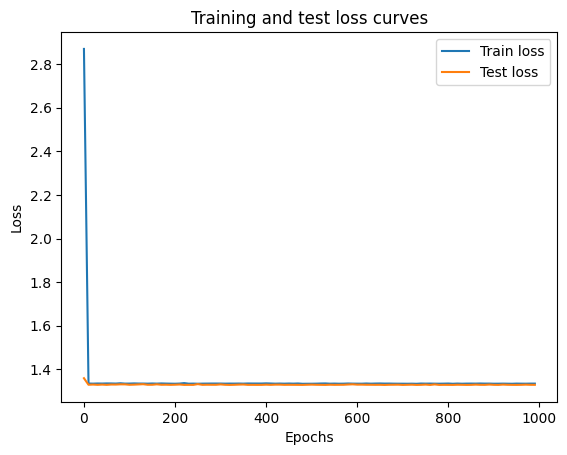

In [50]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [51]:
Y_pred = californiaHousingRegressionModel(X_train_tensor)

In [52]:
Y_pred[:100]

tensor([[2.1034],
        [2.1298],
        [2.0958],
        [2.1295],
        [2.0396],
        [2.0854],
        [2.0897],
        [2.0459],
        [2.1559],
        [2.0604],
        [2.0673],
        [2.0389],
        [2.0896],
        [2.0669],
        [2.1055],
        [2.0970],
        [2.0257],
        [2.0895],
        [2.1041],
        [2.1443],
        [2.0681],
        [2.0590],
        [2.0739],
        [2.0806],
        [2.0397],
        [2.0572],
        [2.1260],
        [2.0535],
        [2.0647],
        [2.0818],
        [2.0949],
        [2.1352],
        [2.0938],
        [2.0645],
        [2.0751],
        [2.0881],
        [2.0456],
        [2.0941],
        [2.0744],
        [2.1055],
        [2.0486],
        [2.0475],
        [2.0934],
        [2.0766],
        [2.0611],
        [2.0701],
        [2.0078],
        [2.0096],
        [2.1047],
        [2.0360],
        [2.0741],
        [2.1270],
        [2.1476],
        [2.1014],
        [2.1085],
        [2

In [53]:
y_train_tensor[:100]

tensor([2.2850, 2.7990, 1.8300, 4.6580, 1.5000, 2.5090, 5.0000, 1.2080, 5.0000,
        0.9930, 1.7340, 1.0950, 1.5240, 1.5750, 3.0310, 1.5150, 1.1750, 2.4880,
        3.4670, 3.6750, 1.4210, 1.3750, 1.6320, 3.3680, 0.4750, 1.3680, 2.1660,
        1.9480, 1.5180, 1.2060, 2.4200, 3.3020, 2.1700, 1.6620, 1.5310, 2.9050,
        1.7390, 2.6890, 1.4460, 1.5190, 1.5630, 0.9170, 3.1500, 1.7410, 1.0720,
        1.0900, 0.7330, 0.6230, 4.0000, 0.6290, 2.0430, 2.4950, 5.0000, 2.8610,
        5.0000, 3.6070, 1.3230, 2.5370, 0.7980, 0.8750, 1.6130, 0.7000, 1.0140,
        3.9550, 1.3320, 2.8530, 2.0820, 1.8900, 0.5320, 3.0210, 2.1380, 2.9750,
        2.7930, 1.3420, 1.7500, 1.2230, 0.7320, 4.9900, 1.3480, 5.0000, 2.9900,
        3.2500, 1.1460, 2.2300, 1.4880, 1.0150, 1.2250, 2.2420, 2.0930, 1.4130,
        1.4300, 1.0690, 2.8830, 3.9820, 0.6180, 1.3750, 3.6530, 1.7410, 1.3750,
        1.3200])